In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
src = cv2.imread('./fig2/airplane.bmp')
mask = cv2.imread('./fig2/mask_plane.bmp', cv2.IMREAD_GRAYSCALE)
dst = cv2.imread('./fig2/field.bmp')

if src is None or mask is None or dst is None:
    print('image read failed')
    sys.exit()
    
cv2.copyTo(src,mask,dst)
#cv2.namedWindow('src', cv2.WINDOW_AUTOSIZE)
cv2.imshow('src', src)
cv2.imshow('mask', mask)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
img = cv2.imread('./fig2/puppy.bmp')

img1 = img[200:400, 300:500].copy()

cv2.circle(img1, (100, 100), 50,(0,0,255), -1) #이렇게 하면 안바뀜 copy를 통해 새로 만든거니까

if img is None:
    print('image read failed')
    sys.exit()
    
cv2.imshow('img', img)
cv2.imshow('img1', img1)

cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
img = np.zeros((400,600,3), np.uint8) #검은색 판넬
img1 = np.ones((400,600,3), np.uint8)*255 #흰색 판넬
img2 = np.full((400,600,3), (123,43,65), np.uint8) #색깔 지정하고 싶다

cv2.imshow('img', img)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)

cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
img = cv2.imread('./fig2/puppy.bmp')
board = np.zeros_like(img)

cv2.imshow('img', img)
cv2.imshow('board', board)

cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
img[200:300,400:600] = (0,0,255)
h, w = img.shape[:2]
print(f'width x height = {w} x {h}')

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

width x height = 640 x 480


In [7]:
import glob
file_paths = glob.glob('./fig/my_images/*.*')
print(file_paths)

cv2.namedWindow('scene', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('scene', cv2.WND_PROP_FULLSCREEN,
                      cv2.WINDOW_FULLSCREEN)

idx = 0
while True:
    img = cv2.imread(file_paths[idx])
    
    if img is None:
        continue
    
    cv2.imshow('scene', img)
    
    if cv2.waitKey(3000) == 27:
        break
    
    idx += 1
    if idx  >= len(file_paths):
        idx =0
        
cv2.destroyAllWindows()

['./fig/my_images\\edgar-nKC772R_qog-unsplash.jpg', './fig/my_images\\hang-niu-Tn8DLxwuDMA-unsplash.jpg', './fig/my_images\\jiawei-zhao-BsXeYX3efOI-unsplash.jpg', './fig/my_images\\kote-puerto-so5nsYDOdxw-unsplash.jpg', './fig/my_images\\nadezhda-nikolaenko-UONij8U_oVc-unsplash.jpg', './fig/my_images\\raoul-droog-yMSecCHsIBc-unsplash.jpg', './fig/my_images\\the-lucky-neko-rplhB9mYF48-unsplash.jpg', './fig/my_images\\tran-mau-tri-tam--81lVsfM4gQ-unsplash.jpg']


(<matplotlib.image.AxesImage at 0x249c3c45280>,
 (-0.5, 1078.5, 873.5, -0.5),
 Text(0.5, 1.0, 'Gray'))

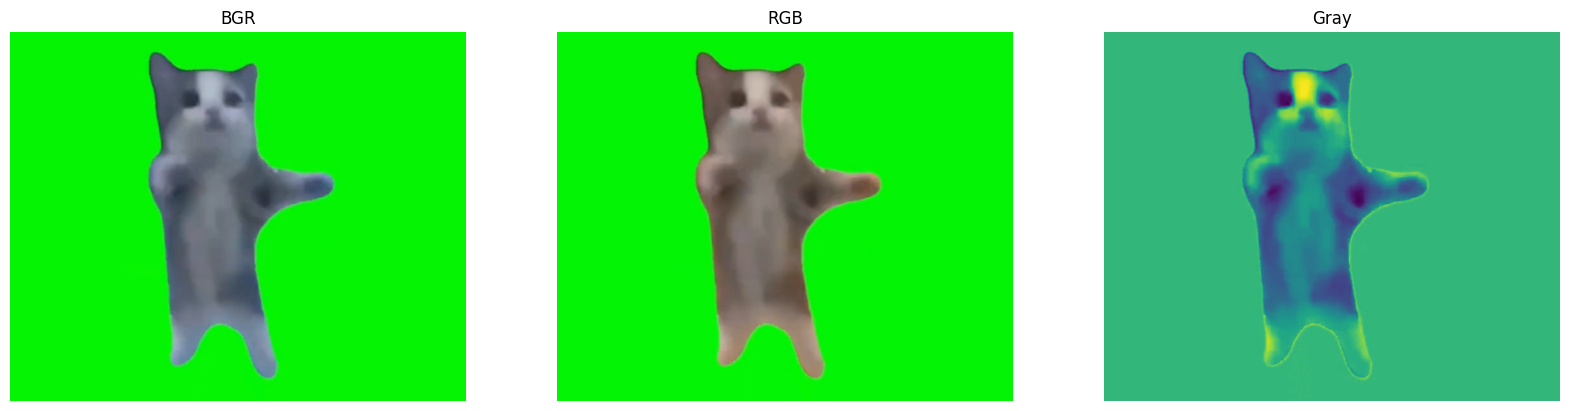

In [8]:
img_BGR = cv2.imread('./fig2/happy-happy-happy-cat-1.jpg')
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
img_GRAY = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1,3,figsize = (20,10))

ax[0].imshow(img_BGR), ax[0].axis('off'), ax[0].set_title('BGR')
ax[1].imshow(img_RGB), ax[1].axis('off'), ax[1].set_title('RGB')
ax[2].imshow(img_GRAY), ax[2].axis('off'), ax[2].set_title('Gray')

In [9]:
img = cv2.imread('./fig2/happy-happy-happy-cat-1.jpg')

if img is None:
    print('image read failed')
    sys.exit()
    
h,w = img.shape[:2]
img_resize = cv2.resize(img, (w//2, h//2), interpolation=cv2.INTER_AREA) #줄일때는 inter area를 쓴다
cv2.imwrite('./img_resize.jpg', img_resize)

cv2.namedWindow('img_resize', cv2.WINDOW_AUTOSIZE)
cv2.imshow('img_resize', img_resize)

while True:
    if cv2.waitKey() == ord('q'):
        break
    
cv2.destroyAllWindows()

In [12]:
src = cv2.imread('./fig2/cow.png')
dst = cv2.imread('./fig2/green.png')

## Mask
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_,mask = cv2.threshold(src_gray, 230,255,cv2.THRESH_BINARY_INV) #150보다 크고 255보다 작은 범위로 마스크만듦

#초원사진의 사이즈가 너무 크기때문에
h,w = src.shape[:2]
dst = cv2.resize(dst, (w, h), interpolation=cv2.INTER_AREA)

cv2.copyTo(src,mask, dst)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('src_gray', mask)

cv2.waitKey()
cv2.destroyAllWindows()

In [75]:
src = cv2.imread('./fig2/cow.png')
dst = cv2.imread('./fig2/green.png')
src = cv2.resize(src, (400,300), interpolation=cv2.INTER_AREA)
dst = cv2.resize(dst, (1100,700), interpolation=cv2.INTER_AREA)

## Mask
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_,mask = cv2.threshold(src_gray, 230,255,cv2.THRESH_BINARY_INV) #150보다 크고 255보다 작은 범위로 마스크만듦

#초원사진의 사이즈가 너무 크기때문에
h,w = src.shape[:2]
dst_crop = dst[400:400+h, 400:400+w]


cv2.copyTo(src, mask, dst_crop)

# cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('mask', mask)
# cv2.imshow('dst_crop', dst_crop)

cv2.waitKey()
cv2.destroyAllWindows()

In [24]:
#안경 알파채널
src = cv2.imread('./fig2/puppy.bmp')
alpha = cv2.imread('./fig2/imgbin_sunglasses_1.png', cv2.IMREAD_UNCHANGED) #알파채널은 무조건 이렇게 읽어야함
alpha = cv2.resize(alpha, (300,150), interpolation=cv2.INTER_AREA)


sunglasses = alpha[:, :, 0:3]
mask = alpha[:, :, -1]

src_crop = src[120:120+150, 220:220+300]


print('src shape = ', src.shape )
print('alpha shape = ', alpha.shape )

# cv2.copyTo(sunglasses, mask, src_crop)
src_crop[mask>0] = (0,0,255)


cv2.imshow('src', src)
cv2.imshow('src_crop', src_crop)
cv2.imshow('sunglasses', sunglasses)
cv2.imshow('mask', mask)

cv2.waitKey()
cv2.destroyAllWindows()

src shape =  (480, 640, 3)
alpha shape =  (150, 300, 4)


In [85]:
#해피캣에 모자 합성하기
src = cv2.imread('./fig2/result.jpg')
alpha = cv2.imread('./fig2/imgbin_hat.png', cv2.IMREAD_UNCHANGED) #알파채널은 무조건 이렇게 읽어야함
alpha = cv2.resize(alpha, (300,300), interpolation=cv2.INTER_AREA)


hat = alpha[:, :, 0:3]
mask = alpha[:, :, -1]

src_crop = src[12:12+300, 345:345+300]


print('src shape = ', src.shape )
# print('alpha shape = ', alpha.shape )

cv2.copyTo(hat, mask, src_crop)
# src_crop[mask>0] = (0,0,255)


cv2.imshow('src', src)
# cv2.imshow('src_crop', src_crop)
# cv2.imshow('hat', hat)
# cv2.imshow('mask', mask)

cv2.waitKey()
cv2.destroyAllWindows()

src shape =  (874, 1079, 3)


In [83]:
#해피캣 초록색 부분 제거하기
import cv2
import numpy as np

src = cv2.imread('./fig2/happy-happy-happy-cat-1.jpg')

# 이미지를 HSV 색 공간으로 변환
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# 초록색 범위 설정 (HSV 색 공간에서의 값)
lower_green = np.array([40, 50, 50])
upper_green = np.array([80, 255, 255])

# 초록색 범위에 해당하는 마스크 생성
mask = cv2.inRange(hsv, lower_green, upper_green)

# 마스크를 반전시킴
inverse_mask = cv2.bitwise_not(mask)

# 이미지에서 초록색 부분을 마스크로 없앰
result = cv2.bitwise_and(src, src, mask=inverse_mask)

cv2.imshow('src', src)
cv2.imshow('inverse_mask', inverse_mask)
cv2.imshow('result', result)

# 결과 이미지 저장
cv2.imwrite('result.jpg', result)

cv2.waitKey()
cv2.destroyAllWindows()


In [90]:
## 들판에 해피캣 합성
src = cv2.imread('./fig2/result.jpg')
dst = cv2.imread('./fig2/green.png')
src = cv2.resize(src, (120,120), interpolation=cv2.INTER_AREA)
dst = cv2.resize(dst, (1100,700), interpolation=cv2.INTER_AREA)

## Mask
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_,mask = cv2.threshold(src_gray, 0,200,cv2.THRESH_BINARY) #150보다 크고 255보다 작은 범위로 마스크만듦

#초원사진의 사이즈가 너무 크기때문에
h,w = src.shape[:2]
dst_crop = dst[400:400+h, 400:400+w]


cv2.copyTo(src, mask, dst_crop)

# cv2.imshow('src', src)
cv2.imshow('dst', dst)
# cv2.imshow('mask', mask)
# cv2.imshow('dst_crop', dst_crop)

cv2.waitKey()
cv2.destroyAllWindows()